Problem 2.2: Let's revisit this graph with computer code.

Using simple data structures such as lists, vectors, sets, maps, and dictionaries, load the above graph in memory.

You may represent it as an edge list or an adjacency list, whichever is the most appropriate. Explain your choice.

For each of the quantities above---the in- and out-degree, the matrix $\bm{\delta}$ of common neighbors, and the number of triangles---write \textbf{an algorithm} that takes your graph representation as output and outputs the quantity. Do not use the matrix formula above; instead, use simple operations such as list traversal, taking the length of lists, set operations, and so on.




In [1]:
import networkx as nx
import pandas as pd
import numpy as np
#import matplotlib as plt


In [3]:
#quick function to convert adjacency matrices to edge lists

def adjacency_matrix_to_edgelist(matrix):
    rows, cols = np.where(matrix == 1)
    edges = list(zip(rows + 1, cols + 1))
    return edges



[(1, 2), (2, 1), (3, 1), (3, 2), (3, 4), (3, 5), (4, 3), (4, 5), (5, 3), (5, 4)]


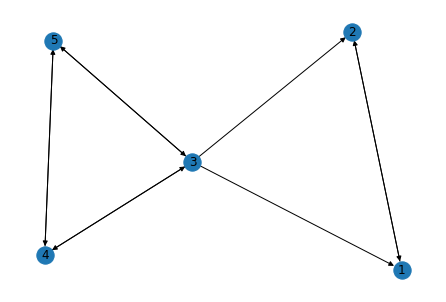

In [9]:
adjacency_matrix = np.array([[0, 1, 0, 0, 0], [1, 0, 0, 0, 0], [1, 1, 0, 1, 1], [0, 0, 1, 0, 1], [0, 0, 1, 1, 0]])
G = nx.from_numpy_matrix(adjacency_matrix, create_using=nx.DiGraph)
mapping = {i: i + 1 for i in G.nodes}

#so labels match the hw representation
G = nx.relabel_nodes(G, mapping)
nx.draw(G,with_labels=True)

print(G.edges)



In [11]:
#a column vector of in-degree, whose i-th entry is the in-degree of node i;
# n is number of nodes
def in_degree_from_edgelist(edges, n):
    indegree = [0] * n
    for (u, v) in edges:
        indegree[v - 1] += 1
    return indegree

print(in_degree_from_edgelist(G.edges, len(G.nodes)))

[2, 2, 2, 2, 2]


In [12]:
#a column vector of out-degree;
def out_degree_from_edgelist(edges, n):
    outdegree = [0] * n
    for (u, v) in edges:
        outdegree[u - 1] += 1
    return outdegree

print(out_degree_from_edgelist(G.edges, len(G.nodes)))


[1, 1, 4, 2, 2]


In [13]:
#the matrix δ whose element δij is equal to the number of common neighbors of nodes i and j;

def common_neighbors_matrix(edges, n):
    neighbors = [[] for _ in range(n)]
    for (u, v) in edges:
        neighbors[u - 1].append(v)
        neighbors[v - 1].append(u)
    delta = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(i + 1, n):
            common = len(set(neighbors[i]).intersection(neighbors[j]))
            delta[i][j] = delta[j][i] = common
    return delta

print(common_neighbors_matrix(G.edges, len(G.nodes)))
    

[[0, 1, 1, 1, 1], [1, 0, 1, 1, 1], [1, 1, 0, 1, 1], [1, 1, 1, 0, 1], [1, 1, 1, 1, 0]]


In [19]:

# this function comes from Cam and Spencer!
adjacency_list = dict(G.adjacency())

def count_triangles(adjacency_list):
    triangles = 0
    for i, neighbor in adjacency_list.items():
        for j in neighbor: 
            if i in adjacency_list[j]:
                for k in adjacency_list[j]:
                    if k in adjacency_list[i]:
                        triangles += 1
    triangles = triangles // 6 
    return(triangles)

print(count_triangles(adjacency_list))


# adjacency_list2 = {1: [2, 3, 4], 2: [1, 4, 5], 3: [1, 4, 6], 4: [1, 2, 3, 5, 6, 7], 5: [2, 4, 7], 6: [3, 4, 7], 7: [4, 5, 6]}
# print(count_triangles(adjacency_list2))

1
6
